# Study of [EPIC212417656](https://exofop.ipac.caltech.edu/k2/edit_target.php?id=212417656)

/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:141: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


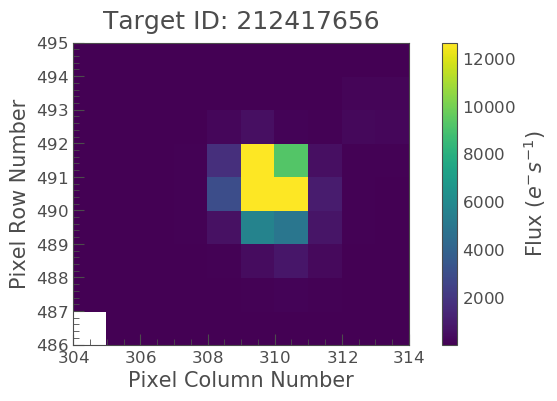

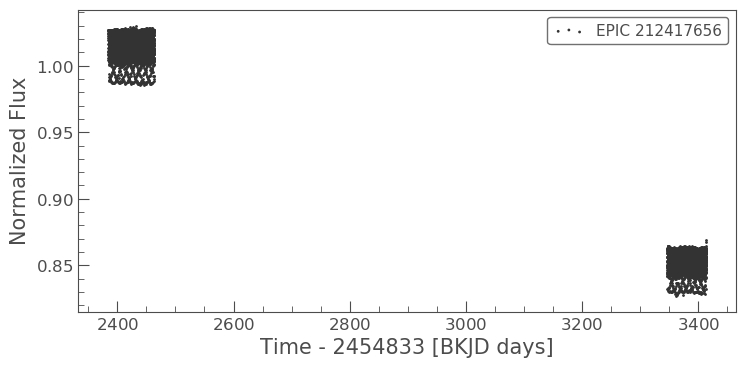

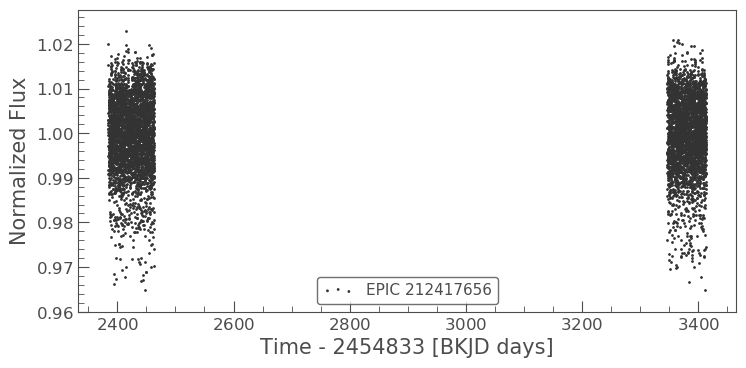

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
target = '212417656'

tpf = search_targetpixelfile(target).download()
tpf.plot()
lc = search_lightcurvefile(target, campaign=6).download().PDCSAP_FLUX.remove_nans()
lc_stitched = lc.append(search_lightcurvefile(target, campaign=17).download().PDCSAP_FLUX.remove_nans())
lc_stitched.scatter()
corr_lc = lc_stitched.to_corrector("sff").correct(windows=40)
corr_lc_f, trend = corr_lc.flatten(window_length=401, return_trend=True)
corr_lc_f.scatter()

Best Fit Period: 5.7054 days


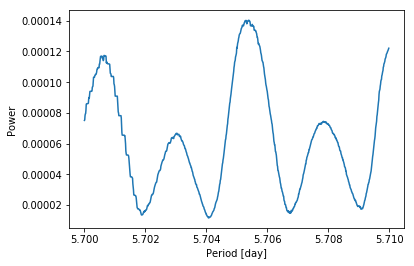

In [8]:
from astropy.stats import BoxLeastSquares
import matplotlib.pyplot as plt

bls = BoxLeastSquares(corr_lc_f.time, corr_lc_f.flux, corr_lc_f.flux_err)
periods = np.arange(5.7, 5.71, 0.00001)
durations = np.arange(0.005, 0.15, 0.001)
periodogram = bls.power(periods, durations)

plt.plot(periodogram.period, periodogram.power)
plt.ylabel("Power")
plt.xlabel("Period [day]");

period = periods[np.argmax(periodogram.power)]
print('Best Fit Period: {:0.4f} days'.format(period))

0.8150571428571137

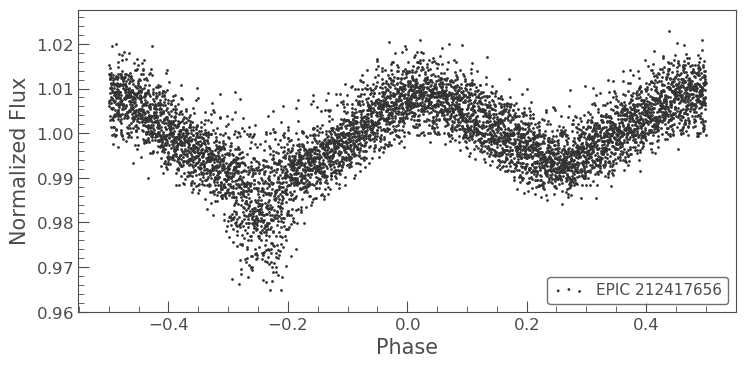

In [18]:
period_f = period / 7
lcf = corr_lc_f.fold(period=period_f,t0=.33)
lcf.scatter()
lcf.time_format = 'jd'
period_f

**Binary stars**